In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

"""d.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)"""

C:\Users\Avanthi\New folder\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


'd.set_option(\'display.max_rows\', None)\npd.set_option("display.max_columns", None)\npd.set_option("display.width", None)'

In [2]:
df = pd.read_csv(r'C:\Users\Avanthi\Desktop\data science\Stats & ML by Sundaram- 27th Nov 2023\23rd Jan 2024\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# pre-prunning
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# check duplicates
df.duplicated().sum()

0

In [6]:
# check missing data
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# check information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
# One hot encoder
df = pd.get_dummies(df,columns=['Geography'],dtype='int', drop_first=True)

In [10]:
df.head(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1


In [11]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [12]:
df['Gender']=df['Gender'].astype('category')
df['Gender']=df['Gender'].cat.codes

In [13]:
df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000


<Axes: >

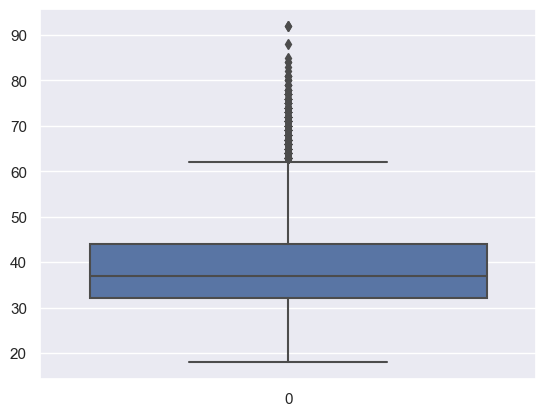

In [14]:
# check outliers
sns.boxplot(df['Age'])

In [15]:
# split the data into ind and dependent variable
x = df.drop('Exited',axis=1)
y = df[['Exited']]

In [16]:
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


In [17]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [18]:
y.value_counts()/len(y)*100 #----imbalance data--- use stratify=y

Exited
0         79.63
1         20.37
Name: count, dtype: float64

In [19]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=101, stratify=y)

In [20]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8000, 11) (2000, 11) (8000, 1) (2000, 1)


In [21]:
# data leakage problem
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

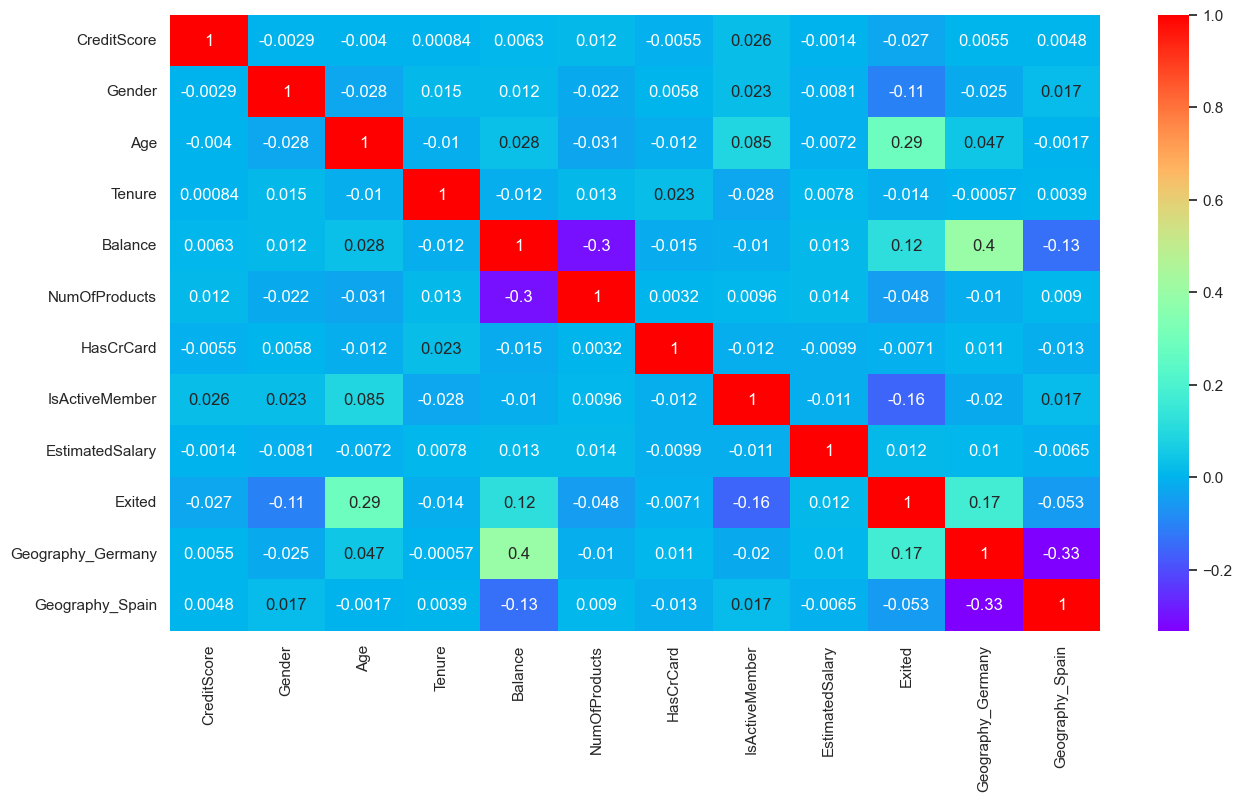

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='rainbow')
plt.show()

In [23]:
import dtale
dtale.show(df)

In [24]:
pd.DataFrame(y_train).value_counts()

Exited
0         6370
1         1630
Name: count, dtype: int64

AttributeError: Rectangle.set() got an unexpected keyword argument 'bin'

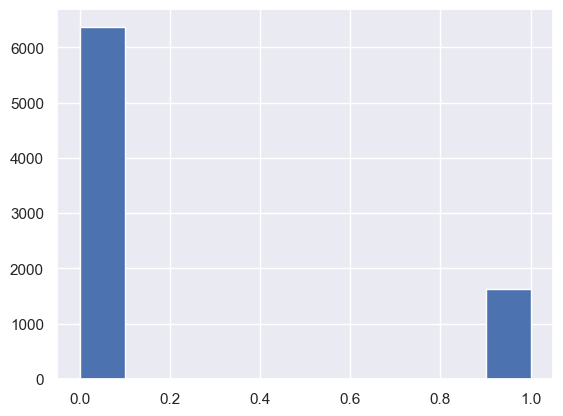

In [25]:
pd.DataFrame(y_train).hist(bin=20)

# build logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)


LogisticRegression()

In [27]:
y_pred_train_log = logit.predict(x_train)
y_pred_test_log = logit.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('train accuracy', accuracy_score(y_train, y_pred_train_log))
print()
print('train accuracy', accuracy_score(y_test, y_pred_test_log))

train accuracy 0.811875

train accuracy 0.8015


# Model-1 Adaboost

In [29]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [30]:
y_pred_train_ada = ada.predict(x_train)
y_pred_test_ada = ada.predict(x_test)

In [31]:
print('train accuracy', accuracy_score(y_train, y_pred_train_ada))
print()
print('train accuracy', accuracy_score(y_test, y_pred_test_ada))

train accuracy 0.861875

train accuracy 0.845


In [32]:
print(confusion_matrix(y_train, y_pred_train_ada))
print()
print(confusion_matrix(y_test, y_pred_test_ada))

[[6087  283]
 [ 822  808]]

[[1517   76]
 [ 234  173]]


In [33]:
print(classification_report(y_train, y_pred_train_ada))
print()
print(classification_report(y_test, y_pred_test_ada))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6370
           1       0.74      0.50      0.59      1630

    accuracy                           0.86      8000
   macro avg       0.81      0.73      0.76      8000
weighted avg       0.85      0.86      0.85      8000


              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.69      0.43      0.53       407

    accuracy                           0.84      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.83      0.84      0.83      2000



# Model-2 Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [35]:
y_pred_train_gbc = gbc.predict(x_train)
y_pred_test_gbc = gbc.predict(x_test)

In [36]:
print('train accuracy', accuracy_score(y_train, y_pred_train_gbc))
print()
print('train accuracy', accuracy_score(y_test, y_pred_test_gbc))

train accuracy 0.87675

train accuracy 0.8555


In [37]:
print(confusion_matrix(y_train, y_pred_train_gbc))
print()
print(confusion_matrix(y_test, y_pred_test_gbc))

[[6173  197]
 [ 789  841]]

[[1540   53]
 [ 236  171]]


In [38]:
print(classification_report(y_train, y_pred_train_gbc))
print()
print(classification_report(y_test, y_pred_test_gbc))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6370
           1       0.81      0.52      0.63      1630

    accuracy                           0.88      8000
   macro avg       0.85      0.74      0.78      8000
weighted avg       0.87      0.88      0.87      8000


              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1593
           1       0.76      0.42      0.54       407

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



# Model-3 Xgboost

In [39]:
!pip install xgboost

In [40]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

In [42]:
print('train accuracy', accuracy_score(y_train, y_pred_train_xgb))
print()
print('train accuracy', accuracy_score(y_test, y_pred_test_xgb))

train accuracy 0.95775

train accuracy 0.8415


In [43]:
print(confusion_matrix(y_train, y_pred_train_xgb))
print()
print(confusion_matrix(y_test, y_pred_test_xgb))

[[6324   46]
 [ 292 1338]]

[[1513   80]
 [ 237  170]]


In [44]:
print(classification_report(y_train, y_pred_train_xgb))
print()
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6370
           1       0.97      0.82      0.89      1630

    accuracy                           0.96      8000
   macro avg       0.96      0.91      0.93      8000
weighted avg       0.96      0.96      0.96      8000


              precision    recall  f1-score   support

           0       0.86      0.95      0.91      1593
           1       0.68      0.42      0.52       407

    accuracy                           0.84      2000
   macro avg       0.77      0.68      0.71      2000
weighted avg       0.83      0.84      0.83      2000



In [45]:
from sklearn.model_selection import cross_val_score
train_accuracy = cross_val_score(xgb, x_train, y_train, cv=10)
print(train_accuracy.mean())

0.85375


# Model-4 Bagging Classifier

In [46]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
bc.fit(x_train, y_train)

BaggingClassifier()

In [47]:
y_pred_train_bc = bc.predict(x_train)
y_pred_test_bc = bc.predict(x_test)

In [48]:
print('train accuracy', accuracy_score(y_train, y_pred_train_bc))
print()
print('train accuracy', accuracy_score(y_test, y_pred_test_bc))

train accuracy 0.9845

train accuracy 0.843


# Model-5 Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [50]:
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

In [51]:
print('train accuracy', accuracy_score(y_train, y_pred_train_rf))
print()
print('train accuracy', accuracy_score(y_test, y_pred_test_rf))

train accuracy 1.0

train accuracy 0.856


In [52]:
print(confusion_matrix(y_train, y_pred_train_rf))
print()
print(confusion_matrix(y_test, y_pred_test_rf))

[[6370    0]
 [   0 1630]]

[[1539   54]
 [ 234  173]]


In [53]:
print(classification_report(y_train, y_pred_train_rf))
print()
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000


              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1593
           1       0.76      0.43      0.55       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



# Model-6 KNN


In [80]:
x = df.drop('Exited',axis=1).values
y = df['Exited'].values

In [81]:
x

array([[6.1900000e+02, 0.0000000e+00, 4.2000000e+01, ..., 1.0134888e+05,
        0.0000000e+00, 0.0000000e+00],
       [6.0800000e+02, 0.0000000e+00, 4.1000000e+01, ..., 1.1254258e+05,
        0.0000000e+00, 1.0000000e+00],
       [5.0200000e+02, 0.0000000e+00, 4.2000000e+01, ..., 1.1393157e+05,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [7.0900000e+02, 0.0000000e+00, 3.6000000e+01, ..., 4.2085580e+04,
        0.0000000e+00, 0.0000000e+00],
       [7.7200000e+02, 1.0000000e+00, 4.2000000e+01, ..., 9.2888520e+04,
        1.0000000e+00, 0.0000000e+00],
       [7.9200000e+02, 0.0000000e+00, 2.8000000e+01, ..., 3.8190780e+04,
        0.0000000e+00, 0.0000000e+00]])

In [82]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [57]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=101, stratify=y)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [59]:
y_pred_train_knn = knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)

In [60]:
print('train accuracy', accuracy_score(y_train, y_pred_train_knn))
print()
print('train accuracy', accuracy_score(y_test, y_pred_test_knn))

train accuracy 0.81775

train accuracy 0.7615


In [61]:
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred != y_test))
    

In [62]:
error_rate

[0.3265,
 0.234,
 0.272,
 0.2255,
 0.2385,
 0.2155,
 0.226,
 0.212,
 0.223,
 0.2115,
 0.216,
 0.2075,
 0.211,
 0.207,
 0.211,
 0.2085,
 0.2075,
 0.2065,
 0.207,
 0.206,
 0.2065,
 0.2055,
 0.2055,
 0.205,
 0.207,
 0.207,
 0.2065,
 0.206,
 0.207]

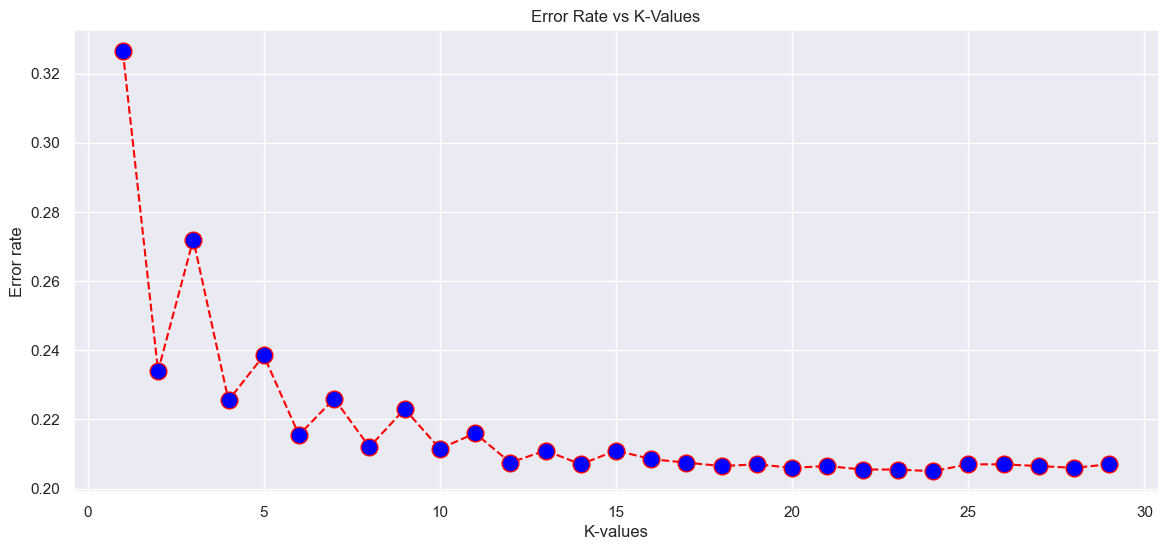

In [63]:
plt.figure(figsize =(14,6))
plt.plot(range(1,30),error_rate, color='red', linestyle='dashed', marker='o', markersize=12,
        markerfacecolor='blue')
plt.title('Error Rate vs K-Values')
plt.xlabel('K-values')
plt.ylabel("Error rate")
plt.show()

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =22)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=22)

In [65]:
y_pred_train_knn = knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)

In [66]:
print('train accuracy', accuracy_score(y_train, y_pred_train_knn))
print()
print('train accuracy', accuracy_score(y_test, y_pred_test_knn))

train accuracy 0.79725

train accuracy 0.7945


# Voting Classifier

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [70]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
clf4 = AdaBoostClassifier()
clf5 = KNeighborsClassifier()
clf6 = BaggingClassifier()
clf7 = GradientBoostingClassifier()
clf8 = XGBClassifier()


In [71]:
estimator = [('lr',clf1),('dt',clf2),('rf',clf3),('ada',clf4),('knn',clf5),('bagg',clf6),('gbc',clf7),('xgb',clf8)]


In [83]:
x.shape

(10000, 11)

In [84]:
y.shape

(10000,)

In [85]:
for estimators in estimator:
    r = cross_val_score(estimators[1], x, y, cv=10, scoring='accuracy')
    print(estimators[0], np.round(np.mean(r), 2))
    

lr 0.79
dt 0.79
rf 0.86
ada 0.86
knn 0.77
bagg 0.85
gbc 0.86
xgb 0.85


In [86]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = estimator, voting = 'soft')
vc_cross_val = cross_val_score(vc, x, y, cv=10, scoring='accuracy')
print(np.round(np.mean(vc_cross_val),2))

0.86


In [87]:
print(vc_cross_val)

[0.857 0.855 0.868 0.856 0.861 0.849 0.864 0.869 0.857 0.856]


# Stacking

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [88]:
from sklearn.ensemble import StackingClassifier

In [90]:
estimator = [('rf', RandomForestClassifier()),('logit',LogisticRegression()),('dtree',DecisionTreeClassifier()),
            ('bagging',BaggingClassifier())]

In [91]:
clf =StackingClassifier(estimators = estimator, final_estimator = LogisticRegression(), cv=10)
clf

StackingClassifier(cv=10,
                   estimators=[('rf', RandomForestClassifier()),
                               ('logit', LogisticRegression()),
                               ('dtree', DecisionTreeClassifier()),
                               ('bagging', BaggingClassifier())],
                   final_estimator=LogisticRegression())

In [92]:
clf.fit(x_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('rf', RandomForestClassifier()),
                               ('logit', LogisticRegression()),
                               ('dtree', DecisionTreeClassifier()),
                               ('bagging', BaggingClassifier())],
                   final_estimator=LogisticRegression())

In [93]:
y_pred_train_clf = clf.predict(x_train)
y_pred_test_clf = clf.predict(x_test)

In [94]:
print(accuracy_score(y_train, y_pred_train_clf))
print()
print(accuracy_score(y_test, y_pred_test_clf))

1.0

0.8505


In [95]:
train_acc = cross_val_score(clf, x_train, y_train, cv=10)
train_acc.mean()

0.86575

2024-05-20 11:15:38,740 - INFO     - Executing shutdown due to inactivity...
2024-05-20 11:15:42,910 - INFO     - Executing shutdown...
2024-05-20 11:15:42,916 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer
